In [1]:
%matplotlib inline
import pylab as plt
plt.style.use('fivethirtyeight')

In [2]:
from animals import Island, Rabbit
import random

# Testing

In [3]:
R = Rabbit(10)

In [4]:
R.age

0

In [5]:
R._age()
R.age

1

In [6]:
random.seed(123)
R2 = R.breed()

In [7]:
R2.survival_skill

9

In [8]:
I = Island(init_rabbits=10, max_pop=100)

In [9]:
I.rabbits

In [10]:
stats = I.compute_epoches(15)

In [11]:
stats[14]

{'pop': 54, 'mean_age': 1.7037037037037037, 'mean_skill': 67.57407407407408}

# Thousand Islands

In [3]:
params = {'init_rabbits':10, 'max_pop':40}
years, N_islands = 15, 1000

islands = [Island(**params) for _ in range(N_islands)]
stats = [ island.compute_epoches(years) for island in islands]

# Harsh Islands

In [4]:
from animals import HarshIsland

In [5]:
params = {'init_rabbits':10, 'max_pop':40, 'env_range':[10,90]}
years, N_islands = 15, 1000

h_islands = [HarshIsland(**params) for _ in range(N_islands)]
h_stats = [ island.compute_epoches(years) for island in h_islands]

## Visualisation

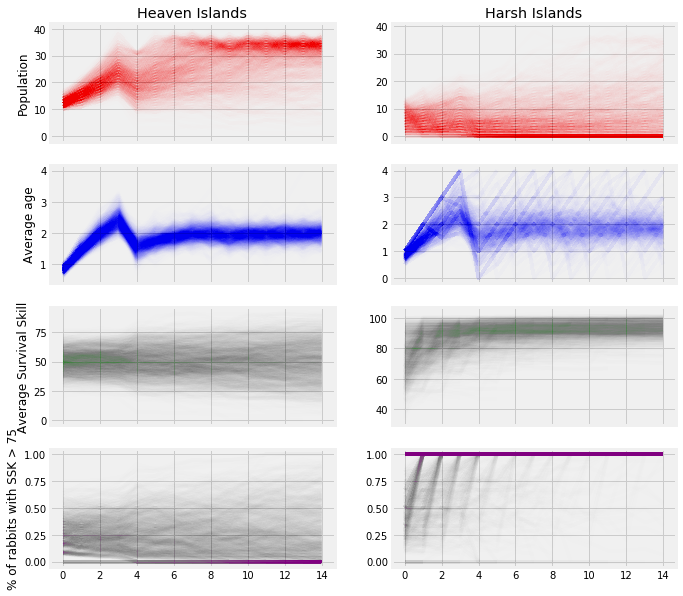

In [13]:
fig, axes = plt.subplots(4,2, figsize=(10,10), sharex=True)

for i, title in enumerate(('Population', 'Average age', 'Average Survival Skill', '% of rabbits with SSK > 75')):
    axes[i][0].set_ylabel(title)

for i, (k, v) in enumerate({"Heaven Islands":stats, 
                            'Harsh Islands':h_stats}.items()):
    axes[0][i].set_title(k)
    
    for s in v: # for each island
        years = list(s.keys())
        
        axes[0][i].plot(years, [v['pop'] for v in s.values()], c='red', alpha=.005)
        axes[1][i].plot(years, [v.get('mean_age', None) for v in s.values()], c='blue', alpha=.005)
        axes[2][i].plot(years, [v.get('mean_skill', None) for v in s.values()], c='green', alpha=.005)
        axes[3][i].plot(years, [v.get('75_skill', None) for v in s.values()], c='purple', alpha=.005)